In [1]:
import numpy as np
from scipy import misc, ndimage
from time import time

def timer(func):
    def f(*args, **kwargs):
        before = time()
        rv = func(*args, **kwargs)
        after = time()
        print("function", func.__name__,"taken",after - before)
        return rv
    return f

@timer
def _gaussian(edge,nn):
    return ndimage.gaussian_filter(edge,sigma=nn*2+1)

@timer
def _getEdge(mask):
    return ndimage.sobel(mask,1)+ndimage.sobel(mask,2)+ndimage.sobel(mask,0)

@timer
def getBoundary(mask, extend_edge = False, nn=1):
    edge = _getEdge(mask)
    if extend_edge: edge = _gaussian(edge,nn)
    binarized = (edge > 0).astype(np.int_)
    return binarized

In [3]:
def pointRend(image, points_to_rend, point_render):
    '''
    parameter:
        image: a 2-D or 3-D image.
        points_to_rend: a 0/1 tensor which has the same shape as the image. 0 means dont rend; 1 means rend.
        render: a function which have a input of an image value and predict a label.
    Returns:
        a tensor which has a same shape of the input image, non-predicted area was labeled 0.
    '''
    assert image.shape == points_to_rend.shape, "image and points_to_rend should have the same shape"

    all_image_rend = render(image)
    return np.multiply(points_to_rend,all_image_rend)

In [ ]:
def maskMerge(backbone_pred, point_rend_pred, points_to_rend):
    '''
    parameter:
        backbone_pred: a 2-D or 3-D mask 
        point_rend_pred: a 2-D or 3-D mask
        points_to_rend: an indicator shown where we trust point_rend
    return
        a tensor which is the merged mask
    '''
    # Now the label are 0,1,2...n for n+1 class, which is not good for our merge
    # We will make n+1 01 tensors for the label.
    

function name: _getEdge
time taken:  0.4947037696838379
function name: getBoundary
time taken:  0.5265898704528809
sum is  13404
max is  1


tuple

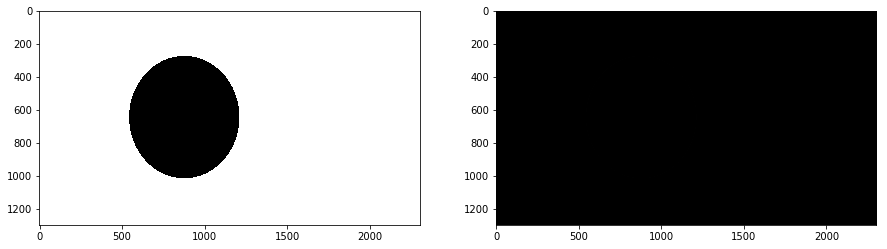

In [5]:
# 2D test
from PIL import Image
mask = np.array(Image.open("mask-2d.png"))
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(mask)
plt.subplot(222)
res_2d = getBoundary(mask)
plt.imshow(res_2d)


print("sum is ", np.sum(res_2d))
print("max is ", np.max(res_2d))
type(mask.shape)

In [105]:
# 3D test
import SimpleITK as sitk
mask_3d = sitk.ReadImage("segmentation-11.nii")
mask_3d = sitk.GetArrayFromImage(mask_3d)
boundary = getBoundary(mask_3d,2)
edge = _getEdge(mask_3d)
pointRend(edge,1)



out_edge = sitk.GetImageFromArray(edge)
sitk.WriteImage(out,'edge.nii.gz')
out = sitk.GetImageFromArray(boundary)
sitk.WriteImage(out,'boundary.nii.gz')

function name: _getEdge
time taken:  9.507561206817627
function name: _gaussian
time taken:  5.541218042373657
function name: getBoundary
time taken:  15.474602937698364
function name: _getEdge
time taken:  9.432779312133789
There are 255 points to be rend


In [113]:
pointRend(boundary,1)

There are 1 points to be rend


In [103]:
print(400*512*512)

104857600


In [114]:
np.sum(boundary)

2465189

In [111]:
np.max(edge)

255

In [112]:
np.average(edge)

0.47030914699570814